In [31]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder


In [37]:
conn = sqlite3.connect("../data/products.db")
products_df = pd.read_sql_query("SELECT * FROM Products", conn)
invoices_df = pd.read_sql_query("SELECT * FROM Invoices", conn)
conn.close()

products_df.head()

,product_id,name,category,price,brand,rating,stock,warranty_years,supplier_country,weight_kg,volume_cm3,power_watt,connectivity_type,material_type,usage_type,price_category
0,1,Wireless Mouse,Accessories,15.99,Logitech,4.4,158,3,USA,5.26,11659.0,2.0,Wireless,Metal,Peripheral,Low
1,2,Keyboard,Accessories,22.50,Logitech,4.2,106,3,China,5.56,16437.0,0.0,Both,Metal,Peripheral,Medium
2,3,Monitor,Electronics,150.00,Samsung,4.9,155,3,Japan,2.26,14371.0,10.0,None,Plastic,Peripheral,High
3,4,USB Cable,Accessories,5.99,Anker,4.3,283,2,Japan,2.73,12261.0,0.0,None,Metal,Display,Low
4,5,Laptop Stand,Accessories,25.00,AmazonBasics,4.3,274,1,South Korea,0.47,3032.0,20.0,Both,Mixed,Furniture,Medium


In [38]:
invoices_df.head()

,invoice_id,product_id
0,2001,9
1,2001,17
2,2001,1
3,2001,25
4,2002,19


In [39]:
print("📦 Count Products  :", products_df.shape)
print("🧾 Count Invoices:", invoices_df.shape)

📦 Count Products  : (25, 16)
🧾 Count Invoices: (146, 2)


In [40]:
print(products_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         25 non-null     int64  
 1   name               25 non-null     object 
 2   category           25 non-null     object 
 3   price              25 non-null     float64
 4   brand              25 non-null     object 
 5   rating             25 non-null     float64
 6   stock              25 non-null     int64  
 7   warranty_years     25 non-null     int64  
 8   supplier_country   25 non-null     object 
 9   weight_kg          25 non-null     float64
 10  volume_cm3         25 non-null     float64
 11  power_watt         25 non-null     float64
 12  connectivity_type  20 non-null     object 
 13  material_type      25 non-null     object 
 14  usage_type         25 non-null     object 
 15  price_category     25 non-null     object 
dtypes: float64(5), int64(3), obj

In [41]:
print(products_df.isnull().sum())
print(invoices_df.isnull().sum())


product_id           0
name                 0
category             0
price                0
brand                0
rating               0
stock                0
warranty_years       0
supplier_country     0
weight_kg            0
volume_cm3           0
power_watt           0
connectivity_type    5
material_type        0
usage_type           0
price_category       0
dtype: int64
invoice_id    0
product_id    0
dtype: int64


In [42]:
products_df.dropna(inplace=True)

## Converting Data Types

Ensure numerical columns are of the correct type for analysis.

In [44]:
# ✅ توحيد أسماء الأعمدة
products_df.columns = products_df.columns.str.strip().str.lower().str.replace(' ', '_')

# ✅ الأعمدة الفئوية التي نريد تحويلها
categorical_cols = [
    'category', 'brand', 'supplier_country',
    'connectivity_type', 'material_type',
    'usage_type', 'price_category'
]

# ✅ إنشاء نسخة للعمل عليها
df_clean = products_df.copy()

# ✅ تنظيف الأعمدة الفئوية من الفراغات أو القيم الغريبة
for col in categorical_cols:
    df_clean[col] = df_clean[col].astype(str).str.strip()

# ✅ تطبيق One-Hot Encoding
df_encoded = pd.get_dummies(df_clean, columns=categorical_cols)

df_encoded

,product_id,name,price,rating,stock,warranty_years,weight_kg,volume_cm3,power_watt,category_Accessories,...,material_type_Mixed,material_type_Plastic,usage_type_Accessory,usage_type_Display,usage_type_Furniture,usage_type_Peripheral,usage_type_Storage,price_category_High,price_category_Low,price_category_Medium
0,1,Wireless Mouse,15.99,4.4,158,3,5.26,11659.0,2.0,True,...,False,False,False,False,False,True,False,False,True,False
1,2,Keyboard,22.50,4.2,106,3,5.56,16437.0,0.0,True,...,False,False,False,False,False,True,False,False,False,True
4,5,Laptop Stand,25.00,4.3,274,1,0.47,3032.0,20.0,True,...,True,False,False,False,True,False,False,False,False,True
5,6,Webcam,45.00,4.1,257,1,5.45,3815.0,10.0,False,...,True,False,False,False,False,False,True,False,False,True
6,7,Headset,29.99,4.3,252,1,2.67,24907.0,5.0,True,...,False,False,True,False,False,False,False,False,False,True
7,8,External HDD,60.00,4.7,114,3,0.96,20116.0,5.0,False,...,True,False,False,False,False,True,False,False,False,True
8,9,Portable SSD,80.00,4.6,168,3,1.13,17074.0,2.0,False,...,True,False,True,False,False,False,False,True,False,False
9,10,Printer,120.00,4.9,40,3,5.16,17893.0,10.0,False,...,False,True,False,False,False,False,True,True,False,False
10,11,Gaming Mouse,35.00,4.9,156,2,2.86,16369.0,0.0,True,...,True,False,False,True,False,False,False,False,False,True
11,12,Mechanical Keyboard,70.00,4.2,58,2,3.44,15035.0,10.0,True,...,True,False,False,True,False,False,False,True,False,False


## Descriptive Statistics

View summary statistics for numerical columns.


In [45]:
products_df.describe()

,product_id,price,rating,stock,warranty_years,weight_kg,volume_cm3,power_watt
count,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,13.100000,53.874000,4.52500,151.850000,2.250000,3.711000,13275.100000,8.950000
std,7.070323,44.604798,0.28631,83.362414,0.850696,1.789325,6863.532142,8.678315
min,1.000000,10.000000,4.10000,40.000000,1.000000,0.470000,3032.000000,0.000000
25%,7.750000,19.500000,4.27500,73.500000,1.750000,2.627500,7016.500000,2.000000
50%,13.000000,40.000000,4.60000,156.000000,2.500000,3.695000,15027.500000,5.000000
75%,19.250000,72.500000,4.75000,205.500000,3.000000,5.477500,17278.750000,12.500000
max,24.000000,180.000000,4.90000,297.000000,3.000000,5.750000,24975.000000,30.000000


## Visualizing Price Distribution

Plot a histogram to understand the distribution of product prices.

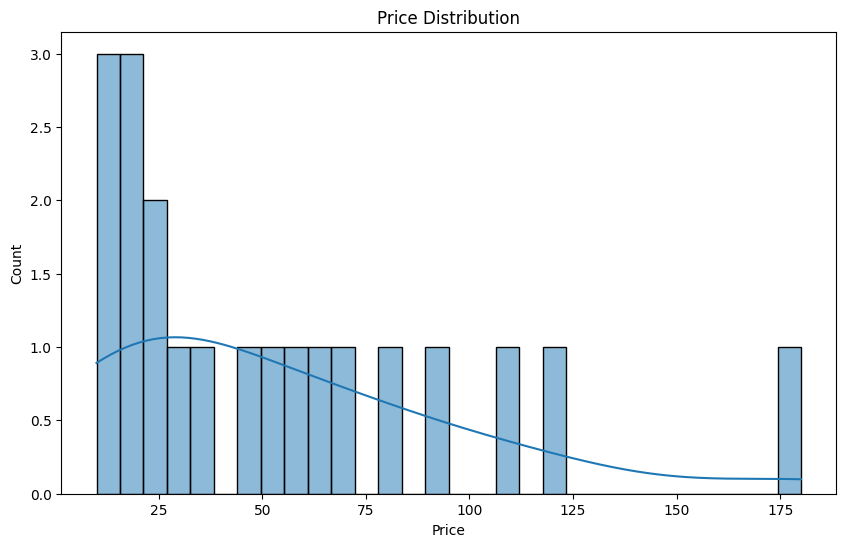

In [46]:
plt.figure(figsize=(10,6))
sns.histplot(products_df['price'].dropna(), bins=30, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


## 💾 Save Datasets
We save the encoded datasets as CSV files to be used later for clustering.

In [47]:
# استبعاد الأعمدة غير المهمة للتحليل العددي
df_encoded_clean = df_encoded.drop(columns=['product_id', 'productname'], errors='ignore')

df_with_price = df_encoded_clean.copy()
df_without_price = df_encoded_clean.drop(columns=['price'])

In [ ]:
df_with_price.to_csv("../data/products_with_price.csv", index=False)
df_without_price.to_csv("../data/products_without_price.csv", index=False)

# Summary

We have loaded, cleaned, and explored the product data.  
This prepares us for further modeling or recommendation system development.
